## GaussianSource

Zdroj [*GausianSource*](https://meep.readthedocs.io/en/latest/Python_User_Interface/#continuoussource) reprezentuje impulz elektromagnetickej energie s nulovou strednou hodnotou. 

In [1]:
%reset -f 
%matplotlib inline

import meep as mp 
import matplotlib.pyplot as plt

dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

sources = [ mp.Source(mp.GaussianSource(frequency=0.1, width=5),
                      component=mp.Ez, center=mp.Vector3(0,0,0) ) ]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=2)

sim.run(until=50)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)

Using MPI version 3.1, 1 processes
-----------
Initializing structure...
run 0 finished at t = 50.0 (200 timesteps)


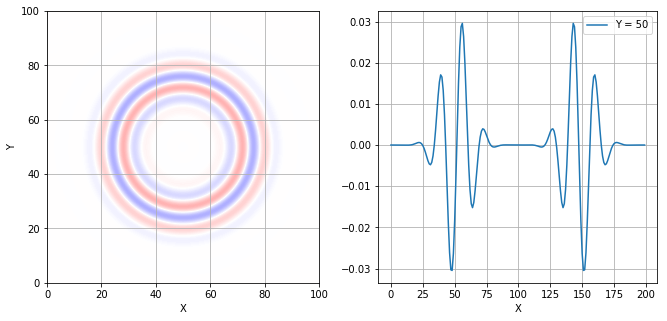

In [3]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
 
plt.imshow(data.transpose(), interpolation='spline36', cmap='bwr', alpha=1.0, 
           extent=(0, dx, 0, dy), norm=plt.Normalize(-0.1, 0.1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(data[100,:], label='Y = 50')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()